# 機械学習実習 第一課題 (第3週から第5週:Python の使い方)


#### 1) リスト の append と extend は何が違うか.実例を挙げて説明せよ

append
- list.append(x) リストの末尾に要素を一つ追加

extend
- list.extend(iterable) イテラブルのすべての要素を対象のリストに追加し、リストを拡張

実例

In [1]:
fruitsA=["apple","mikan"]
fruitsE=["apple","mikan"]
#文字列 イテラブル(反復可能オブジェクト)
fruit = "banana" 

#リストの末尾に文字列が追加される
fruitsA.append(fruit)

# 文字列fruitは、イテラブルなので展開されて１要素ずつリストに追加される。
fruitsE.extend(fruit)

fruitsA,fruitsE

(['apple', 'mikan', 'banana'],
 ['apple', 'mikan', 'b', 'a', 'n', 'a', 'n', 'a'])

In [2]:
fruitsA=["apple","mikan"]
fruitsE=["apple","mikan"]
#リスト イテラブル(反復可能オブジェクト)
newFruits=["orange","kiwi"] 

# リストの末尾にリストが展開されずに追加される
fruitsA.append(newFruits)
# リストnewFruitsはイテラブルなので１要素ずつリストに追加される
fruitsE.extend(newFruits)
fruitsA,fruitsE

(['apple', 'mikan', ['orange', 'kiwi']], ['apple', 'mikan', 'orange', 'kiwi'])

#### 2) 成績を記入した pandas のデータフレーム score がある.

In [17]:
import pandas as pd

# 後のグラフ表記のために名前はローマ字にしています
score =pd.DataFrame([ ["Asada",79,3,33],["Imakawa",75,70,22],["Usa",49,89,65],["Eta",99,47,5],["Ono",96,29,36],["Kanou",94,88,45],["Kishibe",48,17,19],["Kurata",21,67,100],["Kenmochi",88,8,36]],columns=['名前','こくご','さんすう','えいご'])

In [4]:
score

,名前,こくご,さんすう,えいご
0,Asada,79,3,33
1,Imakawa,75,70,22
2,Usa,49,89,65
3,Eta,99,47,5
4,Ono,96,29,36
5,Kanou,94,88,45
6,Kishibe,48,17,19
7,Kurata,21,67,100
8,Kenmochi,88,8,36


##### a) score を入力とし，第一正規型に変換する関数をかけ

In [5]:
# score: pd.DataFrame([[],...],columns=['名前','classA'...])
def firstNormalize(score):
    scores=[]
    for index , item in score.iterrows():
        for i in range(len(item)-1):
            scores.append([item[0],score.columns[i+1],item[i+1]])
    return pd.DataFrame(scores,columns=['名前','科目名','点数'])

In [6]:
firstNormalize(score)

,名前,科目名,点数
0,Asada,こくご,79
1,Asada,さんすう,3
2,Asada,えいご,33
3,Imakawa,こくご,75
4,Imakawa,さんすう,70
5,Imakawa,えいご,22
6,Usa,こくご,49
7,Usa,さんすう,89
8,Usa,えいご,65
9,Eta,こくご,99


##### b)score を入力とし，科目ごとの平均点，各人の平均点を 出力する関数を書け.その動作も記せ

In [7]:
# score: pd.DataFrame([[],...],columns=['名前','classA'...])
# return: [[class1Average,...],[people1Average,...]]
def getScoreAverages(score):
    classScores=[0,0,0]
    peopleScores=[]
    for index , item in score.iterrows():
        # 国語、算数、英語
        peopleScores.append((item[1]+item[2]+item[3])/3)
        classScores[0]= classScores[0]+item[1]
        classScores[1]= classScores[1]+item[2]
        classScores[2]= classScores[2]+item[3]
    classScores[0] = classScores[0] / len(peopleScores)
    classScores[1] = classScores[1] / len(peopleScores)
    classScores[2] = classScores[2] / len(peopleScores)
    return [classScores,peopleScores]

In [8]:
getScoreAverages(score)

[[72.11111111111111, 46.44444444444444, 40.111111111111114],
 [38.333333333333336,
  55.666666666666664,
  67.66666666666667,
  50.333333333333336,
  53.666666666666664,
  75.66666666666667,
  28.0,
  62.666666666666664,
  44.0]]

##### c) normalized を入力とし，科目ごとの平均点，各人の 平均点を出力する関数を書け.その動作も記せ

##### d)さんすうが x 点以上の人数を出力する関数をかけ. その動作も記せ

In [9]:
# score ,standardNum
# counts:number
def getMathExceedCounts(score,standardNum):
    counts=0
    for index , item in score.iterrows():
        if (item[2] >= standardNum):
            counts+=1
    return counts

In [10]:
getMathExceedCounts(score,67)

4

##### e) score に総合点の列を加えるスクリプトをかけ.

In [11]:
def addTotalScore(score):
    
    totals=[]
    for index , item in score.iterrows():
        # 国語、算数、英語
        totals.append((item[1]+item[2]+item[3]))
    score['総合点']=totals
    return score

In [12]:
addTotalScore(score)

,名前,こくご,さんすう,えいご,総合点
0,Asada,79,3,33,115
1,Imakawa,75,70,22,167
2,Usa,49,89,65,203
3,Eta,99,47,5,151
4,Ono,96,29,36,161
5,Kanou,94,88,45,227
6,Kishibe,48,17,19,84
7,Kurata,21,67,100,188
8,Kenmochi,88,8,36,132


##### f) 総合点の降順に並び替え，変数 final に格納せよ.

In [13]:
def sortDes(score):
    newScore =score.sort_values(by='総合点', ascending=False)
    return newScore

In [14]:
final=sortDes(score)

In [15]:
final

,名前,こくご,さんすう,えいご,総合点
5,Kanou,94,88,45,227
2,Usa,49,89,65,203
7,Kurata,21,67,100,188
1,Imakawa,75,70,22,167
4,Ono,96,29,36,161
3,Eta,99,47,5,151
8,Kenmochi,88,8,36,132
0,Asada,79,3,33,115
6,Kishibe,48,17,19,84


##### g)scoreをグラフ化せよ.#matplotlib.pyplot 以外を利用し ても良い.

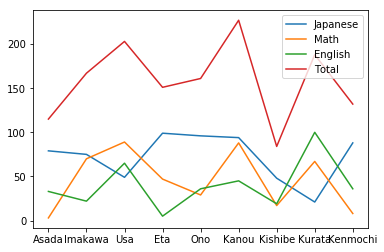

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(score["名前"]),score["こくご"], label='Japanese')
plt.plot(list(score["名前"]),score["さんすう"], label='Math')
plt.plot(list(score["名前"]),score["えいご"], label='English')
plt.plot(list(score["名前"]),score["総合点"], label='Total')
plt.legend()
    

##### h) 次の3つのメソッドの違いを説明せよ. Pandas のメソッド apply, applymap， Pandas.Series のメソッド map

apply
- 
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

applymap
- 
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html

map
- 
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

#### 3) 引数を1つ持つ関数 fib(n) は，以下の式で定義される an を出力する.

##### a1 =1,a2 =1, an =an-1 +an-2 (n>2)
関数 fib(n) を実装せよ.

In [115]:
# n: n >2
def fib(n):
    if n <= 2:
        return 1
    return int(fib(n-1)) + fib(su(n-2))

In [116]:
fib(3)

2

In [117]:
fib(4)

3

In [114]:
fib(7)

6

#### 4) 拡張課題: 以下のプログラムを作成せよ.

思考用メモ
- Web API
-  Geocoding API - 住所から緯度経度を検索 https://www.geocoding.jp/api/
- Google Maps APIを使い、住所から緯度経度を取得しAlteryx上に表示する | データブレンディング・予測分析ならAlteryx│正規代理店LHit株式会社 https://www.lhit.co.jp/Alteryx/case-googlemaps-api/

a) 地球上の2点間の距離を求める関数を作成せよ.
関数名: dist
引数: x,y
x と y の間の距離を求める

##### b)出発地と目的地の二列からなるCSVファイルを読み込み，距離の列を追加する関数を関数 dist を使って書け

##### c) 上記関数 dist や 2)で作成した関数を使った応用事例を提示し，結果を示せ.なお，できる限りプログラムで処理すること.